In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/AIML_IITG/Datasets/hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.isnull().sum()

,0
age,0
physical_score,0
test_result,0


In [6]:
df["test_result"].value_counts()

,count
test_result,
1,3000
0,2000


<Axes: xlabel='age', ylabel='physical_score'>

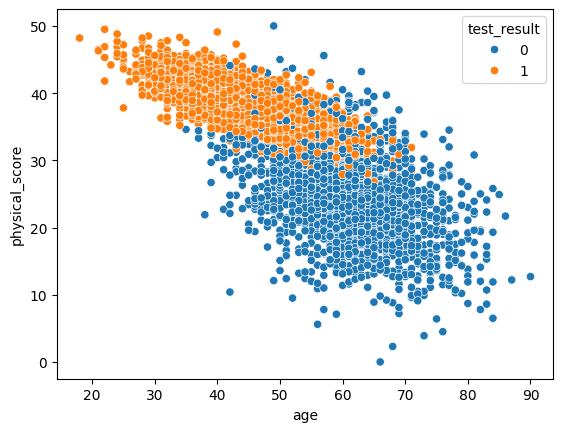

In [7]:
sns.scatterplot(x="age",y="physical_score",hue="test_result",data=df)

In [8]:
X = df[["age","physical_score"]]
y = df["test_result"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.3)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [9]:
class RBFnetwork:
  def __init__(self,n_hidden_neurons=10):
    self.n_hidden_neurons=n_hidden_neurons
    self.centers=None
    self.spread = None
    self.weights = None


  def gaussian_rbf(self,X,center,spread):
    distance = np.linalg.norm(X-center,axis=1)**2
    return np.exp(-distance/(2*spread**2))


  def compute_activation_matrix(self,X):
    G = np.zeros((X.shape[0],self.n_hidden_neurons))
    for i in range(self.n_hidden_neurons):
      G[:,i]=self.gaussian_rbf(X,self.centers[i],self.spread)
    return G


  def fit(self,X,y):
    kmeans = KMeans(n_clusters=self.n_hidden_neurons,random_state=50,n_init="auto")
    kmeans.fit(X)
    self.centers = kmeans.cluster_centers_

    dmax = 0
    for i in range(self.n_hidden_neurons):
      for j in range(i+1,self.n_hidden_neurons):
        d = np.linalg.norm(self.centers[i]-self.centers[j])
        if d>dmax:
          dmax = d
    self.spread = dmax/np.sqrt(2*self.n_hidden_neurons)


    #finding weights
    G = self.compute_activation_matrix(X)
    n_classes = len(np.unique(y))
    y_one_hot = np.eye(n_classes)[y]

    G_pseudo_inverse = np.linalg.pinv(G)
    self.weights = np.dot(G_pseudo_inverse,y_one_hot)

  def predict(self,X):
    #Activation Matrix G for new data
    G = self.compute_activation_matrix(X)

    #Compute the final output scores
    output_scores = np.dot(G,self.weights)

    return np.argmax(output_scores,axis=1)





In [10]:
rbf_net = RBFnetwork(n_hidden_neurons=100)
rbf_net.fit(x_train_scaled,y_train)

In [11]:
y_pred = rbf_net.predict(x_test_scaled)

In [17]:
print(f"Accuracy score: {accuracy_score(y_test,y_pred)*100:.2f} %")

Accuracy score: 93.60 %


In [13]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[525,  54],
       [ 42, 879]])

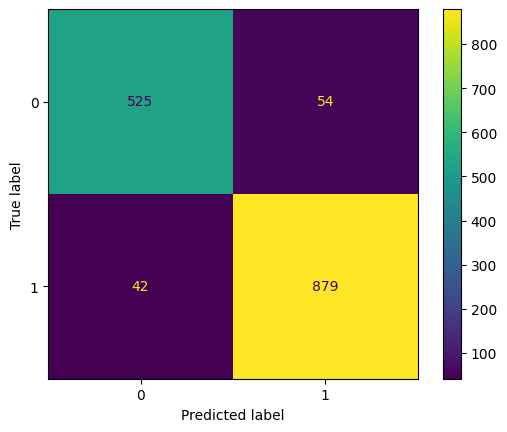

In [14]:
ConfusionMatrixDisplay(conf).plot()